In [2]:
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

Si tenemos la ecuación diferencial
$$y'(x) = f(x,y)$$
Podemos tomar
$$\int_{x_n}^{x_{n+1}} y'(x) dx = \int_{x_n}^{x_{n+1}}f(x,y) dx$$
Por lo tanto
$$y(x_{n+1}) dx = y(x_n) +\int_{x_n}^{x_{n+1}}f(x,y) dx$$
Expresando a $f(x,y)$ como su serie de Taylor tenemos
$$f(x,y) = f(x_0,y_n) + hf'(x_n,y_n) + \frac{h^2}{2} f''(x_n,y_n) +O(h^3)$$

Por lo tanto reescribimos como
$$y(x_{n+1}) \approx y(x_n) + hf(x_0,y_n) + O(h^2)$$

Una mejor opción sería escribirlo como
$$f(x,y) = f(x_0,y_n) + h\frac{d}{dx}f'(x_n,y_n) + \frac{h^2}{2} \frac{d^2}{dx^2}f(x_n,y_n) +O(h^3)$$
$$f(x,y) = f(x_0,y_n) + h\frac{d}{dx}f(x_n,y_n) + \frac{h^2}{2} f''(x_n,y_n) +O(h^3)$$


Pero $$\frac{d}{dx}f(x_n,y_n) = \left(\frac{\partial f(x_n,y_n)}{\partial x} + \frac{\partial f(x_n,y_n)}{\partial y} f(x_n,y_n)\right)$$

Por lo tanto 
$$y(x_{n+1}) \approx y(x_n) + hf(x_n,y_n) + \frac{h^2}{2}\left(\frac{\partial f(x_n,y_n)}{\partial x} + \frac{\partial f(x_n,y_n)}{\partial y} f(x_n,y_n)\right) + O(h^3)$$

In [3]:
def metodo1D(funcion, jacob, metodo, p_ini, tiempos, h=0.01):
    y = [0]*len(tiempos)
    y[0] = p_ini
    y = metodo(y, tiempos, funcion, jacob)
    solucion = [tiempos, y]
    return solucion


def euler_plus(y, tiempo, funcion, jacob):
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*funcion(y[i], tiempo[i]) + 0.5*h*h*(jacob(y[i], tiempo[i])[0]+jacob(y[i], tiempo[i])[1]*funcion(y[i], tiempo[i]))
    return y

def euler(y, tiempo, funcion, jacob):
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*funcion(y[i], tiempo[i])
    return y

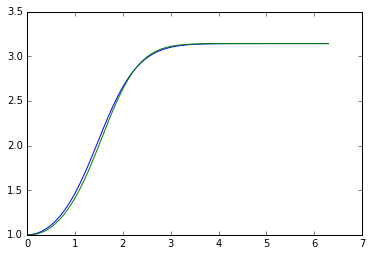

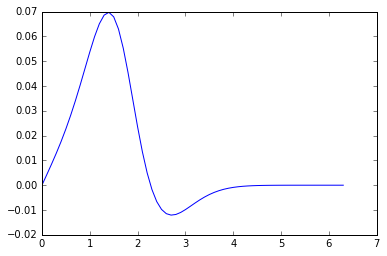

In [7]:
def ec_dif(y, x):
    return x*sin(y)

def ec_jac(y, x):
    return sin(y), x*cos(y)
    
h = 0.1
p_ini = 1
tiempos = arange(0, 2*pi+h, h)

sol1 = metodo1D(ec_dif, ec_jac, euler_plus, p_ini, tiempos, h)
sol2 = metodo1D(ec_dif, array([0,0]), euler, p_ini, tiempos, h)

dif = [sol1[1][i] - sol2[1][i] for i in range(len(sol1[1]))]

plot(sol1[0], sol1[1], sol1[0], sol2[1]);
show()
plot(sol1[0], dif);

$$ \vec{y_{n+1}} \approx \vec{y_{n}}+ h\vec{f}(x_n,y_n)+\frac{1}{2}h \left[ \frac{\partial \vec{f}}{\partial x} + \vec{J}(\vec{f}(x_n,y_n))\cdot\vec{f}(x_n,y_n)\right]$$